In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [82]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [83]:
df = df.drop('customerID',axis=1)

In [84]:
df.shape

(7043, 20)

In [85]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [86]:
df['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [88]:
cat = ['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity',
      'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod',
      'Churn']

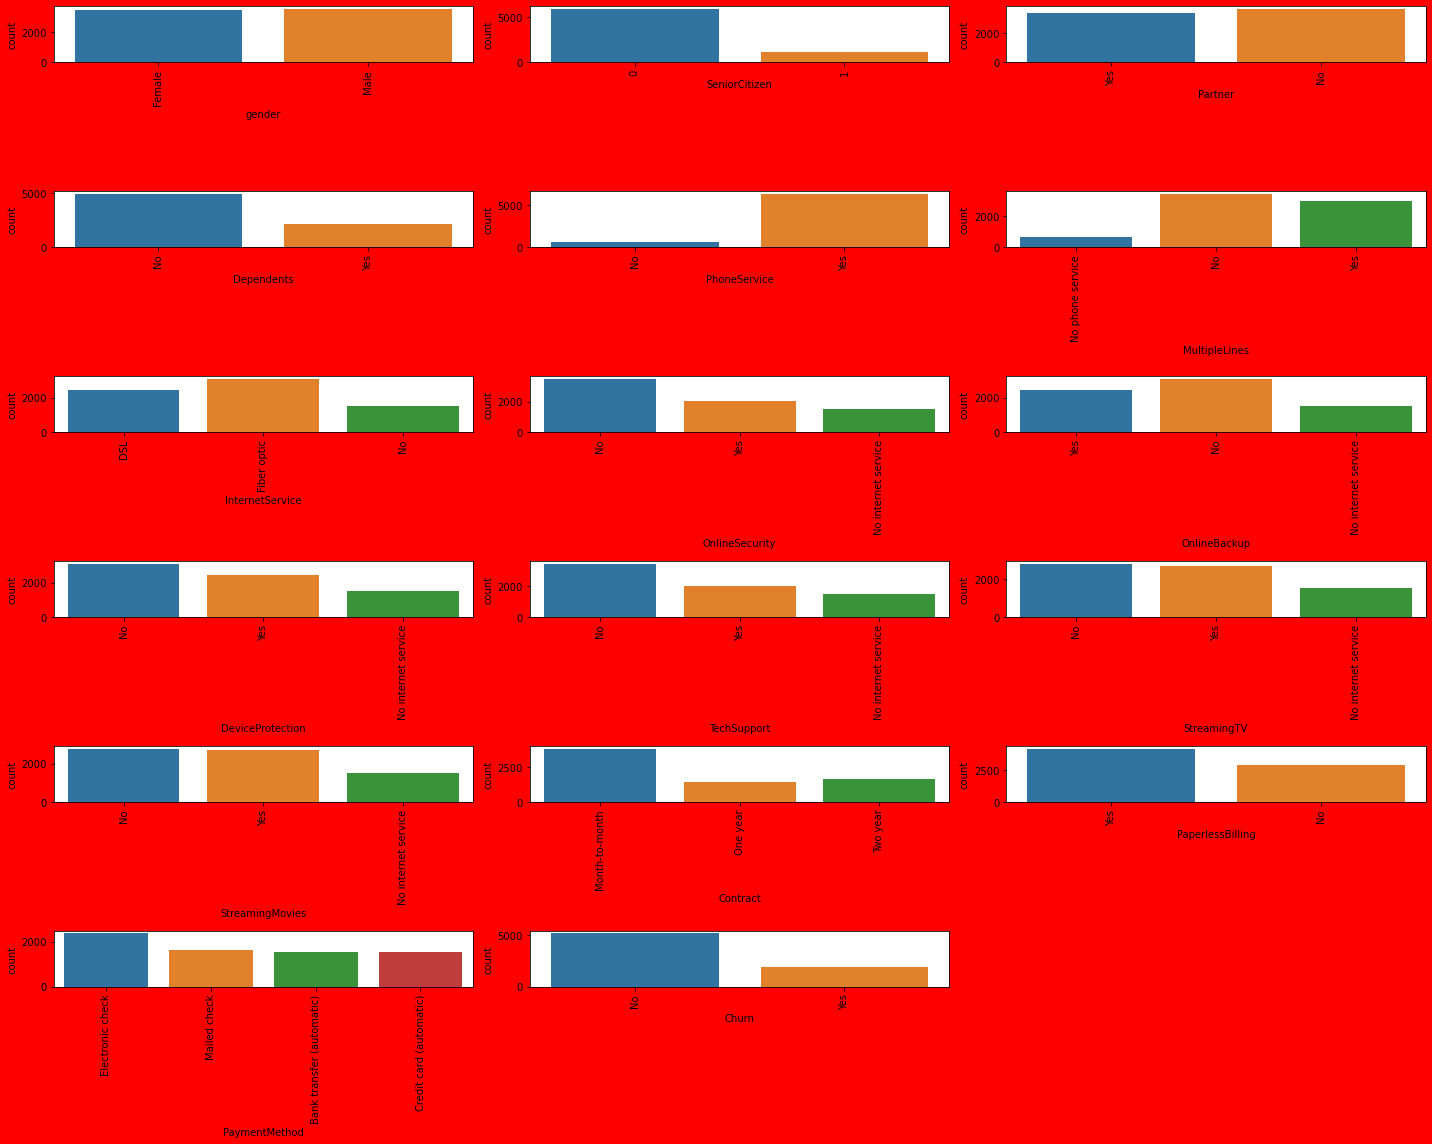

In [89]:
plt.figure(figsize=(20,16),facecolor='red')
plotnumber = 1
for i in cat :
    if plotnumber <= 17:
        ax = plt.subplot(6,3,plotnumber)
        sns.countplot(df[i])
        plt.xticks(rotation=90)
        
    plotnumber += 1  
    
plt.tight_layout()

In [90]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [92]:
num = ['tenure','MonthlyCharges','TotalCharges']

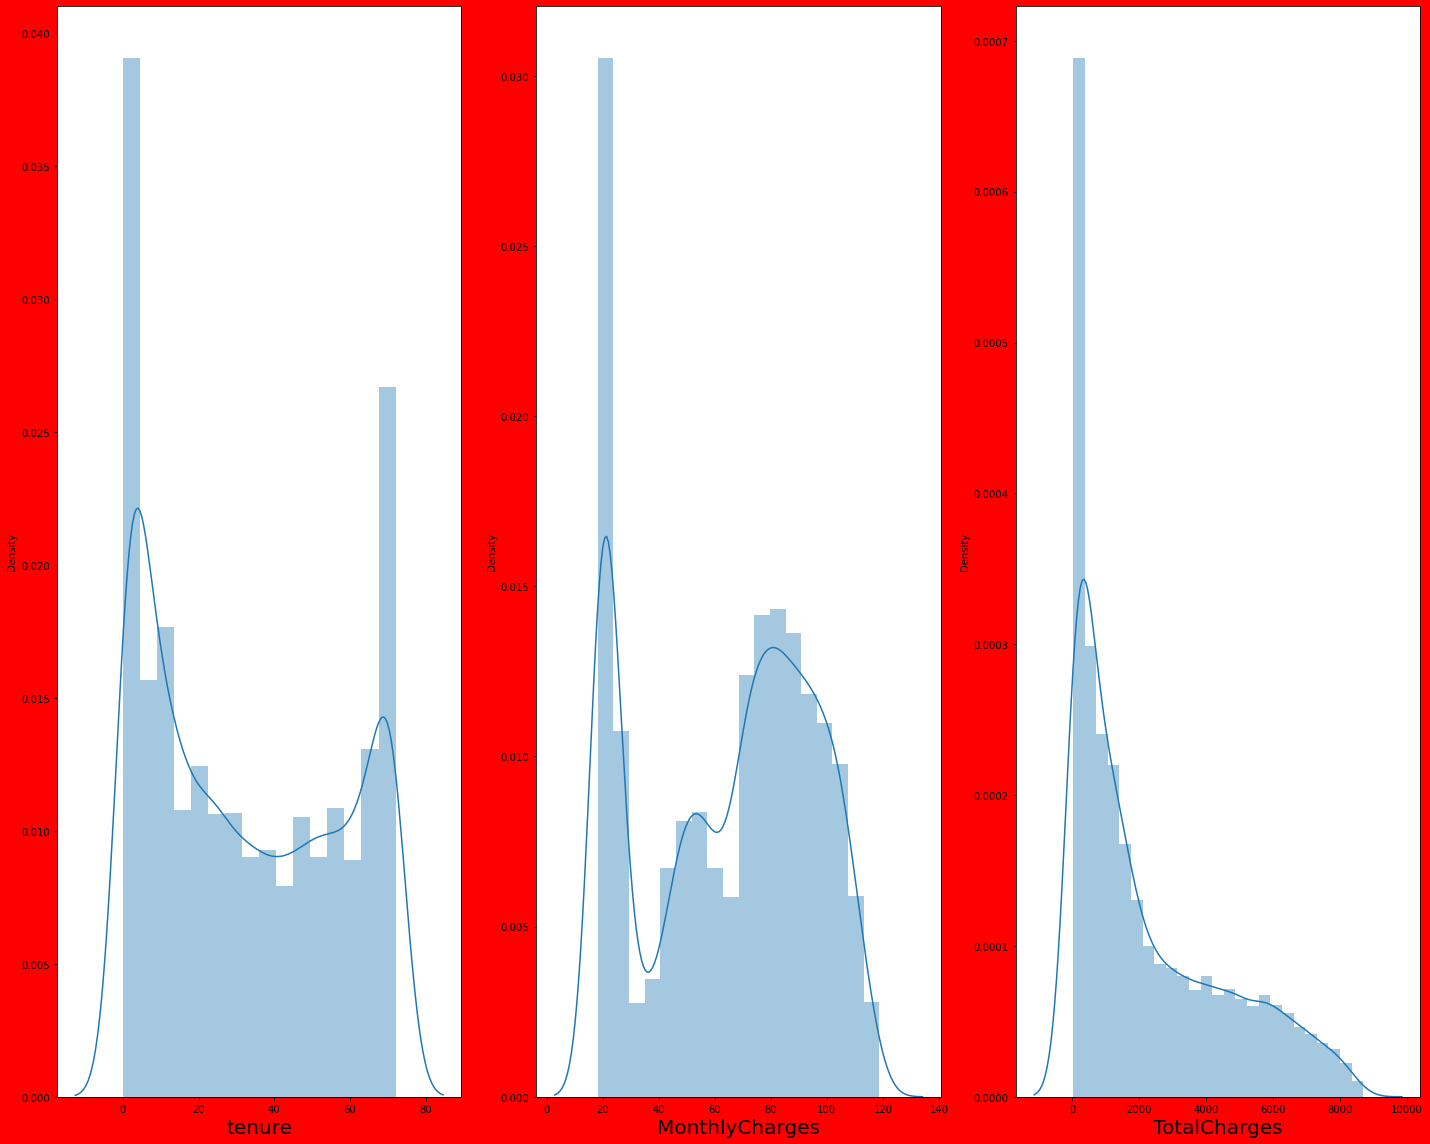

In [93]:
plt.figure(figsize=(20,16),facecolor='red')
plotnumber = 1
for i in num:
    if plotnumber <= 3:
        ax = plt.subplot(1,3,plotnumber)
        sns.distplot(df[i])
        plt.xlabel(i,fontsize=20)
        
    plotnumber += 1  
    
plt.tight_layout()

In [94]:
df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [101]:
df = df.dropna()

In [102]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [95]:
df.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102411
tenure,0.016567,1.000000,0.247900,0.825880
MonthlyCharges,0.220173,0.247900,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


In [96]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [97]:
df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.961642
dtype: float64

In [108]:
df.TotalCharges = np.log(df.TotalCharges)

In [109]:
df.shape

(7032, 20)

In [110]:
df.drop_duplicates(inplace=True)

In [111]:
df.shape

(7010, 20)

In [112]:
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()

In [113]:
for t in df.columns:
    if df[t].dtypes == 'object':
        print(t)
        df[t] = lab_enc.fit_transform(df[t])

gender
Partner
Dependents
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
Churn


In [114]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,3.396185,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,7.544068,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,4.683519,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,7.517928,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,5.021575,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,7.596141,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,8.904209,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,5.847739,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,5.725544,1


<AxesSubplot:>

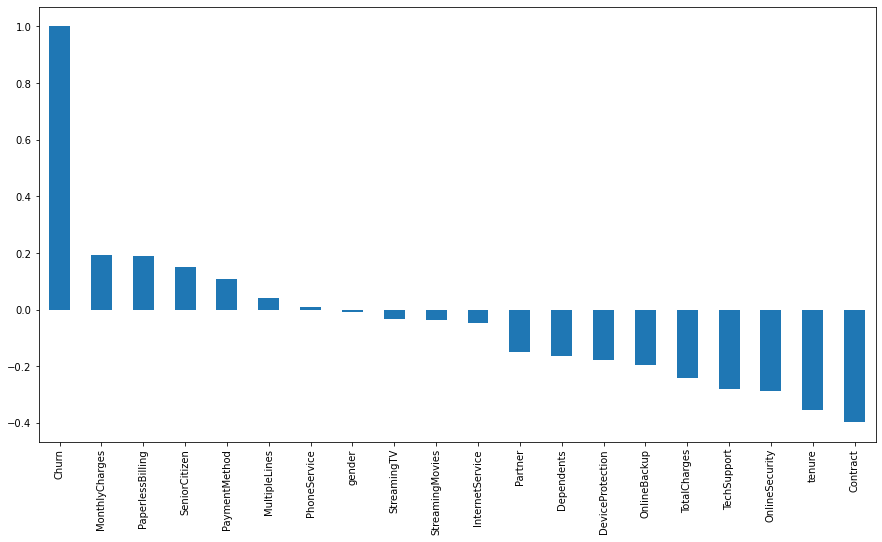

In [116]:
plt.figure(figsize=(15,8))
df.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

In [117]:
from sklearn.preprocessing import StandardScaler

In [118]:
scaler = StandardScaler()

In [119]:
X = df.drop('Churn',axis=1)
y = df.Churn

In [120]:
X_scaler = scaler.fit_transform(X)

In [121]:
from sklearn.model_selection import train_test_split

In [122]:
X_train,X_test,y_train,y_test = train_test_split(X_scaler,y,test_size=0.25,random_state=355)

In [123]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score,roc_curve,accuracy_score,precision_score,confusion_matrix,recall_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score,cross_val_predict

In [124]:
from sklearn.neighbors import KNeighborsClassifier

In [125]:
def print_score(clf,X_train,X_test,y_train,y_test,train=True):
    if train:
        y_pred = clf.predict(X_train)
        print("\n ===Train result===")
        print(f"Accuracy Score:{accuracy_score(y_train,y_pred)*100:.2f}%")
    elif train==False:
        pred = clf.predict(X_test)
        print("\n ===Test result===")
        print(f"Accuracy Score:{accuracy_score(y_test,pred)*100:.2f}%")
        print('\n \n Test classification report \n',classification_report(y_test,pred,digits=2))

In [126]:
svc = SVC()
svc.fit(X_train,y_train)
print_score(svc,X_train,X_test,y_train,y_test,train=True)
print_score(svc,X_train,X_test,y_train,y_test,train=False)


 ===Train result===
Accuracy Score:83.09%

 ===Test result===
Accuracy Score:79.86%

 
 Test classification report 
               precision    recall  f1-score   support

           0       0.83      0.92      0.87      1290
           1       0.67      0.47      0.55       463

    accuracy                           0.80      1753
   macro avg       0.75      0.69      0.71      1753
weighted avg       0.79      0.80      0.79      1753



In [127]:
gbdt = GradientBoostingClassifier()
gbdt.fit(X_train,y_train)
print_score(gbdt,X_train,X_test,y_train,y_test,train=True)
print_score(gbdt,X_train,X_test,y_train,y_test,train=False)


 ===Train result===
Accuracy Score:83.18%

 ===Test result===
Accuracy Score:80.60%

 
 Test classification report 
               precision    recall  f1-score   support

           0       0.85      0.90      0.87      1290
           1       0.66      0.55      0.60       463

    accuracy                           0.81      1753
   macro avg       0.75      0.72      0.74      1753
weighted avg       0.80      0.81      0.80      1753



In [128]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
print_score(rf,X_train,X_test,y_train,y_test,train=True)
print_score(rf,X_train,X_test,y_train,y_test,train=False)


 ===Train result===
Accuracy Score:99.83%

 ===Test result===
Accuracy Score:78.04%

 
 Test classification report 
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1290
           1       0.60      0.49      0.54       463

    accuracy                           0.78      1753
   macro avg       0.72      0.69      0.70      1753
weighted avg       0.77      0.78      0.77      1753



In [129]:
dc = DecisionTreeClassifier()
dc.fit(X_train,y_train)
print_score(dc,X_train,X_test,y_train,y_test,train=True)
print_score(dc,X_train,X_test,y_train,y_test,train=False)


 ===Train result===
Accuracy Score:99.83%

 ===Test result===
Accuracy Score:73.53%

 
 Test classification report 
               precision    recall  f1-score   support

           0       0.83      0.81      0.82      1290
           1       0.50      0.53      0.51       463

    accuracy                           0.74      1753
   macro avg       0.66      0.67      0.67      1753
weighted avg       0.74      0.74      0.74      1753



In [130]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
print_score(lr,X_train,X_test,y_train,y_test,train=True)
print_score(lr,X_train,X_test,y_train,y_test,train=False)


 ===Train result===
Accuracy Score:80.83%

 ===Test result===
Accuracy Score:80.95%

 
 Test classification report 
               precision    recall  f1-score   support

           0       0.85      0.91      0.88      1290
           1       0.67      0.54      0.60       463

    accuracy                           0.81      1753
   macro avg       0.76      0.72      0.74      1753
weighted avg       0.80      0.81      0.80      1753



In [131]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
print_score(knn,X_train,X_test,y_train,y_test,train=True)
print_score(knn,X_train,X_test,y_train,y_test,train=False)


 ===Train result===
Accuracy Score:83.22%

 ===Test result===
Accuracy Score:76.67%

 
 Test classification report 
               precision    recall  f1-score   support

           0       0.83      0.85      0.84      1290
           1       0.56      0.52      0.54       463

    accuracy                           0.77      1753
   macro avg       0.70      0.69      0.69      1753
weighted avg       0.76      0.77      0.76      1753

